# Campus Recruitment

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Logistic_Regression.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


# Missing Values

In [4]:
df.isnull().sum()*100/df.shape[0]

sl_no              0.000000
gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

In [5]:
df['salary'].fillna(df['salary'].mean(),inplace =True)

In [6]:
df.isnull().sum()*100/df.shape[0]

sl_no             0.0
gender            0.0
ssc_p             0.0
ssc_b             0.0
hsc_p             0.0
hsc_b             0.0
hsc_s             0.0
degree_p          0.0
degree_t          0.0
workex            0.0
etest_p           0.0
specialisation    0.0
mba_p             0.0
status            0.0
salary            0.0
dtype: float64

In [7]:
listem= ['ssc_b',"hsc_b","hsc_s","degree_t","workex","specialisation","status"]
for i in listem:
    print(i+ '\n',df[i].unique())

ssc_b
 ['Others' 'Central']
hsc_b
 ['Others' 'Central']
hsc_s
 ['Commerce' 'Science' 'Arts']
degree_t
 ['Sci&Tech' 'Comm&Mgmt' 'Others']
workex
 ['No' 'Yes']
specialisation
 ['Mkt&HR' 'Mkt&Fin']
status
 ['Placed' 'Not Placed']


In [8]:
df['status'].replace({'Placed':1,'Not Placed':0},inplace=True)

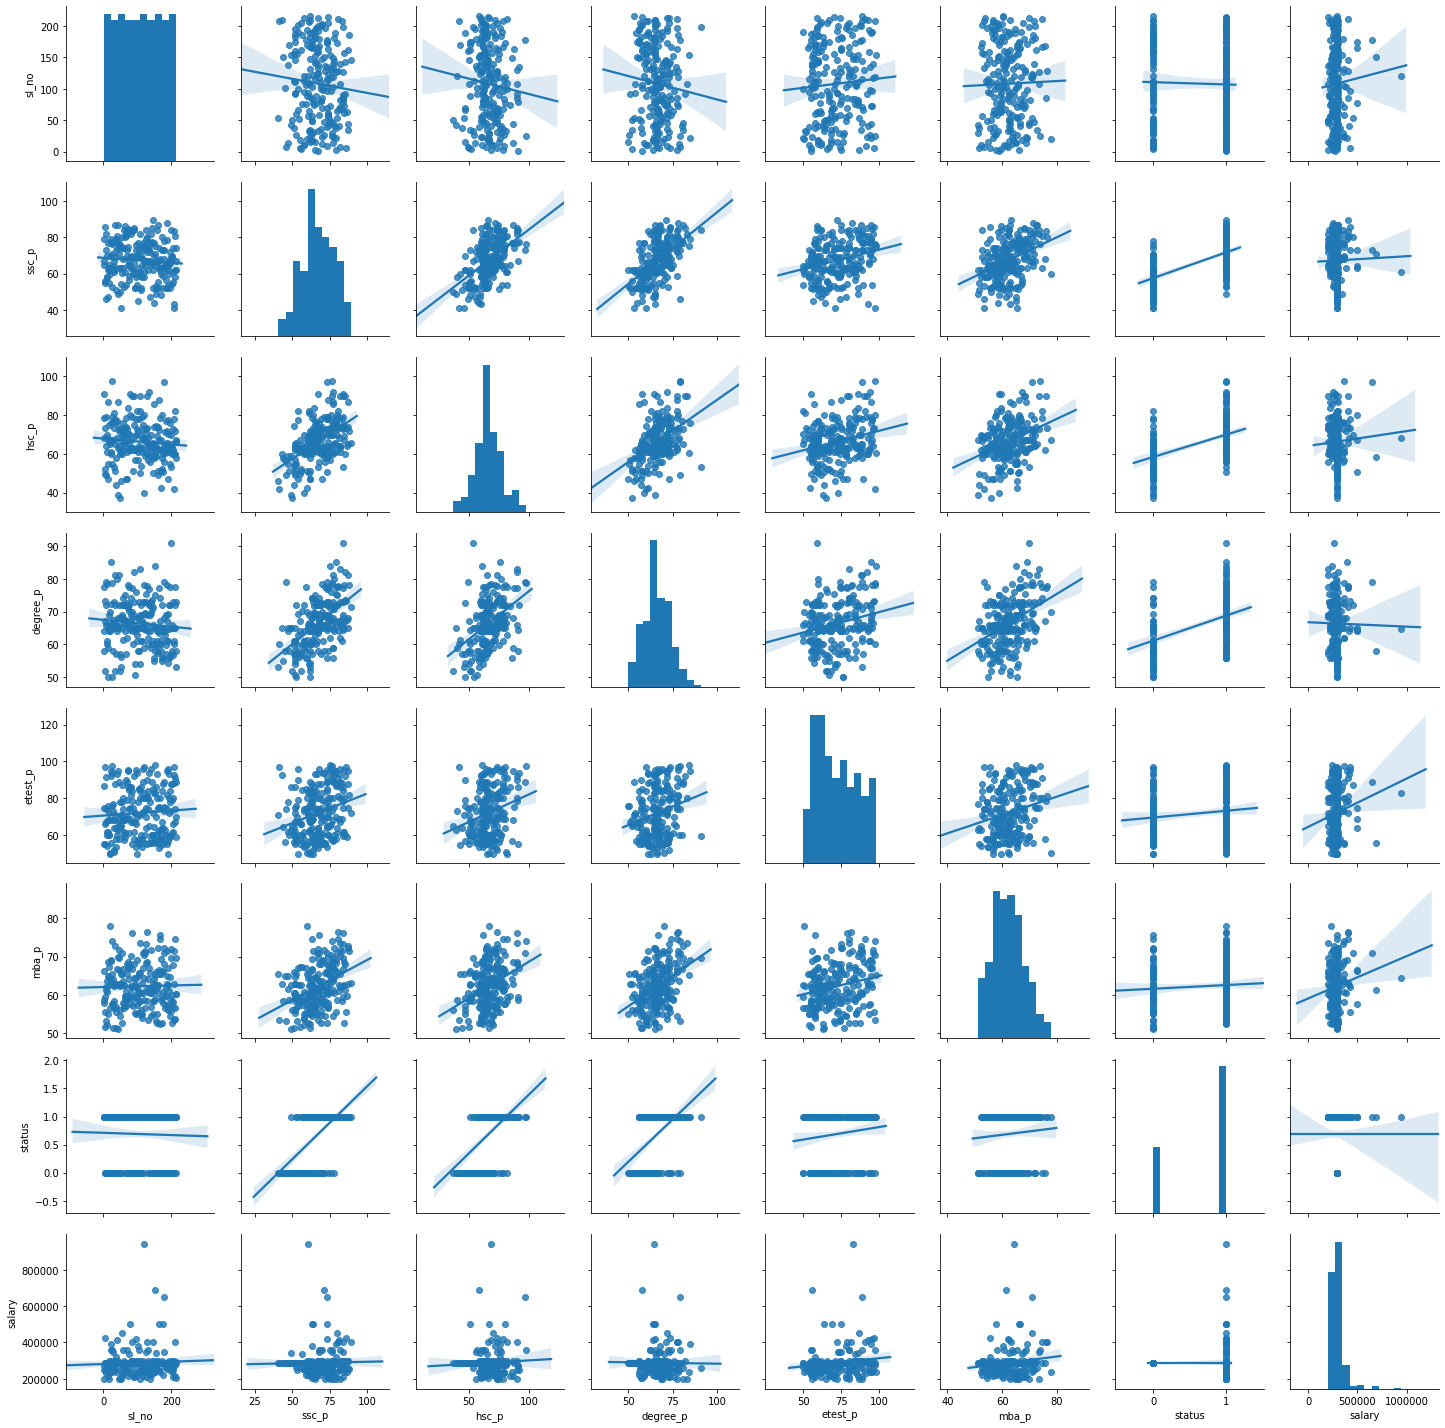

In [9]:
sns.pairplot(df,kind="reg")

In [10]:
df_corr= df.corr()
df_corr

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,-2.685942e-02,5.155040e-02
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,6.078887e-01,2.357072e-02
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,4.912279e-01,5.450558e-02
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,4.798610e-01,-1.414817e-02
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,1.276394e-01,1.528286e-01
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,7.692165e-02,1.463245e-01
status,-0.026859,0.607889,0.491228,0.479861,0.127639,0.076922,1.000000e+00,9.450535e-17
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,9.450535e-17,1.000000e+00


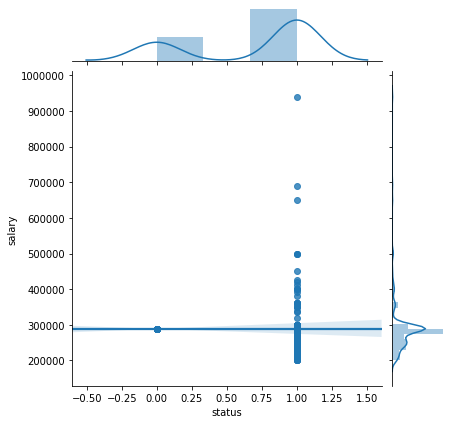

In [11]:
sns.jointplot(x='status', y='salary', data= df , kind="reg")

In [12]:
df['status'].value_counts()

1    148
0     67
Name: status, dtype: int64

In [13]:
df["ssc_b"]= pd.get_dummies(df.ssc_b)
df["hsc_b"]= pd.get_dummies(df.hsc_b)
df["workex"]= df.workex.replace({'No':0,'Yes':1})
df["specialisation"]= pd.get_dummies(df.specialisation)
df["gender"]= pd.get_dummies(df.gender)
df["hsc_s"]= pd.get_dummies(df.hsc_s)
df["degree_t"]= pd.get_dummies(df.degree_t)

# Model 

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [15]:
y = df['status']
X = df.drop('status', axis=1)

# Normalization

In [16]:
scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

# HyperParametrs 

In [17]:
logistic=LogisticRegression()

parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2'],'solver': ('linear', 'lbfgs', 'liblinear')}


grid_cv = GridSearchCV(estimator=logistic,
                       param_grid = parameters,
                       cv = 10)
grid_cv.fit(X, y)
print("The best parameters : ", grid_cv.best_params_)
print("The best score         : ", grid_cv.best_score_)

The best parameters :  {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
The best score         :  0.8608225108225108


# The Best Logistic Regression Model

In [18]:
model = LogisticRegression(solver='liblinear',penalty='l1',C=10000)

In [19]:
def create_model(X,y,model,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    model.fit(X_train, y_train)
    
    prediction_train=model.predict(X_train)
    prediction_test=model.predict(X_test)
    
    prediction_test_prob = model.predict_proba(X_test)[:,1]
    
    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test_prob)},name=tip)
    return d

In [20]:
metrics=pd.DataFrame()
metrics=metrics.append(create_model(X_scl,y,model,tip='Logistic_Regr.'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729


# Cross Validation

In [21]:
lrm = LogisticRegression(solver='liblinear',penalty='l1',C=0.1)
cv = cross_validate(estimator=lrm,
                     X=X_scl,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores          : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.81818182 0.81818182 0.81818182 0.77272727 0.86363636 0.9047619
 0.9047619  0.80952381 0.80952381 0.76190476]
--------------------------------------------------
Train Scores          : 
[0.84974093 0.87046632 0.85492228 0.85492228 0.85492228 0.86082474
 0.84536082 0.8556701  0.8556701  0.86597938]


In [22]:
print('Mean of Test Sets : ', cv['test_score'].mean())
print('Mean of Train Sets : ', cv['train_score'].mean())

Mean of Test Sets :  0.8281385281385282
Mean of Train Sets :  0.8568479247903424


# K-Nearest Neighbour

In [27]:
y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)
X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

Knn=KNeighborsClassifier(n_neighbors=5)
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
test_preds=Knn.predict(X_test)
y_probs=Knn.predict_proba(X_test)[:,1]

In [30]:
def metric(x,y):
    print("Precision Score: {}".format(precision_score(x,y)))
    print('Recall Score   : {}'.format(recall_score(x,y)))
    print("Accuracy Score : {}".format(accuracy_score(x,y)))
    print("F1 Score       : {}".format(f1_score(x,y)))
    print("AUC Score      : {}".format(roc_auc_score(y_test,y_probs)))
metric(y_test,test_preds)

Precision Score: 0.8181818181818182
Recall Score   : 0.9
Accuracy Score : 0.7906976744186046
F1 Score       : 0.8571428571428572
AUC Score      : 0.8423076923076923


# Model Tuning

In [29]:
Knn=KNeighborsClassifier()
k_range = list(range(1,25))
parameter = dict(n_neighbors=k_range)
grid = GridSearchCV(Knn, parameter, cv=10, scoring='roc_auc')
Grds = grid.fit(X,y)
print('The best parameters:', Grds.best_estimator_)
print('The best score:', Grds.best_score_)

The best parameters: KNeighborsClassifier(n_neighbors=1)
The best score: 0.993095238095238


# Cross Validation

In [27]:

Knn = KNeighborsClassifier(n_neighbors=1)
cv = cross_validate(estimator=Knn,
                     X=X_scl,
                     y=y,
                     cv=10,return_train_score=True
                    )
print('Test Scores            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Train Scores          : ', cv['train_score'], sep = '\n')

Test Scores            : 
[0.63636364 0.81818182 0.72727273 0.86363636 0.81818182 0.80952381
 0.9047619  0.71428571 0.71428571 0.61904762]
--------------------------------------------------
Train Scores          : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
print('Mean of Test Sets : ', cv['test_score'].mean())
print('Mean of Train Sets : ', cv['train_score'].mean())

Mean of Test Sets :  0.7625541125541127
Mean of Train Sets :  1.0


# KNN Model Tuning Results

In [31]:
Knn_model = KNeighborsClassifier(n_neighbors=1)

In [32]:
metrics=metrics.append(create_model(X_scl,y,Knn_model,tip='Knn_model.'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000


# CART Algoritm

In [33]:
cart_model = DecisionTreeClassifier(criterion='entropy', random_state=1337)

y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

cart_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1337)

In [44]:
test_preds=cart_model.predict(X_test)
train_preds=cart_model.predict(X_train)
y_probs=cart_model.predict_proba(X_test)[:,1]

In [42]:
metric(y_test,test_preds) #Test Score

Precision Score: 1.0
Recall Score   : 0.9666666666666667
Accuracy Score : 0.9767441860465116
F1 Score       : 0.983050847457627
AUC Score      : 0.9833333333333334


In [45]:
metric(y_train,train_preds) #Train Score

Precision Score: 1.0
Recall Score   : 1.0
Accuracy Score : 1.0
F1 Score       : 1.0
AUC Score      : 0.9833333333333334


# Model Tuning

In [36]:
cart_params= {'min_samples_split':range(2,20), 
             "max_leaf_nodes":range(2,10),
             "max_features":range(0,5)}

cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10)

cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1337),
             param_grid={'max_features': range(0, 5),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 20)})

In [37]:
cart_cv_model.best_params_

{'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}

# CART Model Tuning Results

In [46]:
cart_model = DecisionTreeClassifier(criterion='entropy', random_state=1337,max_features= 4,max_leaf_nodes=7, min_samples_split=2 )

In [47]:
metrics=metrics.append(create_model(X_scl,y,cart_model,tip='cart_model.'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
cart_model.,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000


# Random Forest 

In [48]:
randomF_model = RandomForestClassifier(n_estimators=25, random_state=2)

y = df['status']
X = df.drop('status', axis=1)
scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

randomF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=25, random_state=2)

In [49]:
y_preds_rd = randomF_model.predict(X_test)
print("Random Forest Accuracy Score : {:.2f}".format(accuracy_score(y_test, y_preds_rd)))

Random Forest Accuracy Score : 0.98


In [50]:
feature_importances = pd.DataFrame(randomF_model.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
salary,0.349999
hsc_p,0.158588
ssc_p,0.145174
degree_p,0.082758
etest_p,0.068617
specialisation,0.050556
mba_p,0.041039
sl_no,0.039420
workex,0.023893
degree_t,0.012000


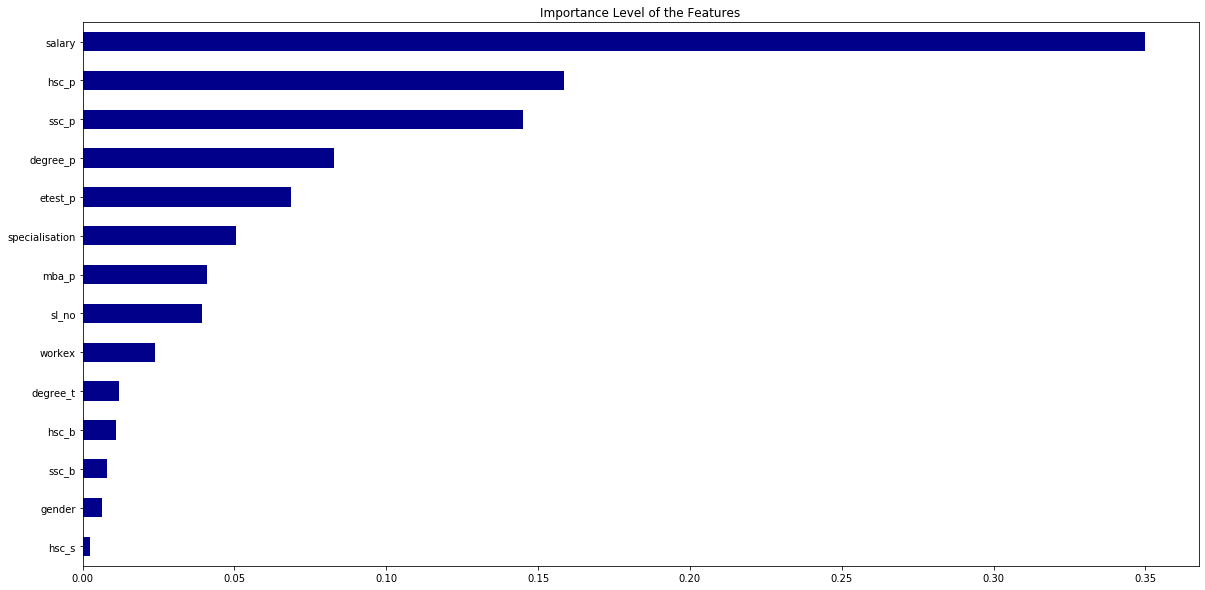

In [51]:
plt.figure(figsize=(20,10))
importance_level = pd.Series(data=randomF_model.feature_importances_,
                        index= X.columns)

importance_level_sorted = importance_level.sort_values()

importance_level_sorted.plot(kind='barh', color='darkblue')
plt.title('Importance Level of the Features')
plt.show()

# Model Tuning

In [113]:
rf_params = {'max_depth': [2,3,5,8,10],
            "max_features":[5,8,10,12,14],
            "n_estimators":[10,500,1000],
            "min_samples_split":[2,5,10]}

rf_cv_model= GridSearchCV(randomF_model, rf_params , cv=10)

rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=25, random_state=2),
             param_grid={'max_depth': [2, 3, 5, 8, 10],
                         'max_features': [5, 8, 10, 12, 14],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]})

In [115]:
print("The best paramters :"+str(rf_cv_model.best_params_))

The best paramters :{'max_depth': 8, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


# Random Forest Model Tuning Results

In [53]:
randomF_model = RandomForestClassifier(n_estimators=500, random_state=2,max_depth=8 , max_features=5 ,min_samples_split=2  )

In [54]:
metrics=metrics.append(create_model(X_scl,y,randomF_model,tip='Random_Forest_Model'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
cart_model.,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000
Random_Forest_Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# SVM Model

In [55]:
svm_model = SVC(kernel="linear")

y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
test_preds=svm_model.predict(X_test)
train_preds=svm_model.predict(X_train)

# Test Score 

In [57]:
metric(y_test,test_preds)

Precision Score: 0.9285714285714286
Recall Score   : 0.8666666666666667
Accuracy Score : 0.8604651162790697
F1 Score       : 0.896551724137931
AUC Score      : 0.9833333333333334


#  Train Score

In [58]:
metric(y_train,train_preds)

Precision Score: 0.9098360655737705
Recall Score   : 0.940677966101695
Accuracy Score : 0.8953488372093024
F1 Score       : 0.925
AUC Score      : 0.9833333333333334


# Model Tuning

In [129]:
svm_params = {'C': np.arange(1,10)}

svc=SVC(kernel='linear')

svc_cv_model = GridSearchCV(svc , svm_params, cv = 10 , n_jobs= -1 , verbose=2) # n_jobs = means using all processors, verbose = Controls the verbosity: the higher, the more messages
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.2s finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [131]:
print("Thw best params : "+str(svc_cv_model.best_params_))

Thw best params : {'C': 1}


# SVC('Linear') Model Tuning Results

In [59]:
svc_model = SVC(kernel="linear", C=1)

def create_model_2(X,y,model,tip):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    model = SVC(kernel="linear", C=1)
    model.fit(X_train, y_train)
    
    prediction_train=model.predict(X_train)
    prediction_test=model.predict(X_test)
    

    d = pd.Series({'Accuracy_Train':accuracy_score(y_train,prediction_train),
                   'Precision_Train':precision_score(y_train,prediction_train),
                   'Recall_Train':recall_score(y_train,prediction_train),
                   'F1 Score_Train':f1_score(y_train,prediction_train),
                   'Accuracy_Test':accuracy_score(y_test,prediction_test),
                   'Precision_Test':precision_score(y_test,prediction_test),
                   'Recall_Test':recall_score(y_test,prediction_test),
                   'F1 Score_Test':f1_score(y_test,prediction_test),
                   'AUC Score':roc_auc_score(y_test, prediction_test)},name=tip)
    return d

In [60]:
metrics=metrics.append(create_model_2(X_scl,y,svc_model,tip='SVC_model'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
cart_model.,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000
Random_Forest_Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SVC_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729


# SVC('RBF')

In [61]:
svm_model = SVC(kernel="rbf")

y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

svm_model.fit(X_train,y_train)

SVC()

In [62]:
test_preds=svm_model.predict(X_test)
train_preds=svm_model.predict(X_train)

In [63]:
metric(y_test,test_preds) #test score

Precision Score: 0.9310344827586207
Recall Score   : 0.9
Accuracy Score : 0.8837209302325582
F1 Score       : 0.9152542372881356
AUC Score      : 0.9833333333333334


In [64]:
metric(y_train,train_preds) #train score

Precision Score: 0.9354838709677419
Recall Score   : 0.9830508474576272
Accuracy Score : 0.9418604651162791
F1 Score       : 0.9586776859504132
AUC Score      : 0.9833333333333334


# SVC('RBF) Model Tuning 

In [157]:
svm_params = {'C': np.arange(1,10)}

svc=SVC(kernel='rbf')

svc_cv_model = GridSearchCV(svc , svm_params, cv = 10 , n_jobs= -1 , verbose=2) # n_jobs = bütün işlemciler fll performans,, verbose = çıktıları göstermek için kullannığımız argüman
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.1s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [158]:
print("Thw best params : "+str(svc_cv_model.best_params_))

Thw best params : {'C': 2}


# SVC('RBF) Model Tuning Results

In [65]:
svm_model = SVC(kernel="rbf", C=2)

metrics=metrics.append(create_model_2(X_scl,y,svm_model,tip='SVC_rbf_model'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
cart_model.,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000
Random_Forest_Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SVC_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729
SVC_rbf_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729


# XGBoost 

In [72]:
!pip install xgboost 
conda install -c conda-forge xgboost
conda install -c conda-forge/label/cf202003 xgboost
conda install -c conda-forge xgboost=0.6a2

In [68]:
y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

xgb_model = XGBClassifier(base_score=0.5)# Be carefull. IF you update. Base_score=None and will give you error.  
xgb_model.fit(X_train,y_train)

XGBClassifier()

In [69]:
test_preds=xgb_model.predict(X_test)
train_preds=xgb_model.predict(X_train)

In [70]:
metric(y_test,test_preds) #test score

Precision Score: 1.0
Recall Score   : 0.9666666666666667
Accuracy Score : 0.9767441860465116
F1 Score       : 0.983050847457627
AUC Score      : 0.9833333333333334


In [71]:
metric(y_train,train_preds) #train score

Precision Score: 1.0
Recall Score   : 1.0
Accuracy Score : 1.0
F1 Score       : 1.0
AUC Score      : 0.9833333333333334


# XGBoost Model Tuning

In [ ]:
xgb_params = {'n_estimators':[100,500,1000,2000],
             "subsample":[0.6, 0.8, 1.0],
             "max_depth":[3,4,5,6],
             "learning_rate":[0.1,0.01,0.02,0.05],
             "min_sample_split":[2,5,10]}

xgb = XGBClassifier(base_score=0.5)
xgb_cv_model = GridSearchCV(xgb , xgb_params, cv = 10 , n_jobs= -1 , verbose=2) # n_jobs = bütün işlemciler fll performans,, verbose = çıktıları göstermek için kullannığımız argüman
xgb_cv_model.fit(X_train, y_train)

In [71]:
print("Thw best params : "+str(xgb_cv_model.best_params_))

Thw best params : {'learning_rate': 0.1, 'max_depth': 3, 'min_sample_split': 2, 'n_estimators': 100, 'subsample': 0.6}


# XGBoost Model Tuning Results

In [72]:
xgb_model = XGBClassifier(base_score=0.5,learning_rate= 0.1 , max_depth=3,min_sample_split=2,  n_estimators=100, subsample=0.6)

metrics=metrics.append(create_model(X_scl,y,xgb_model,tip='xgb_model'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
cart_model.,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000
Random_Forest_Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SVC_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729
SVC_rbf_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729
xgb_model,1.000000,0.976744,1.000000,0.983051,1.000000,1.000000,1.000000,0.966667,1.000000


# Light GBM

In [ ]:
#!conda install -c conda-forge lightgbm

In [73]:
y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X_scl,y, test_size=0.20, random_state=40, stratify = y)

lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train,y_train)

LGBMClassifier()

In [74]:
test_preds=lgbm_model.predict(X_test)
train_preds=lgbm_model.predict(X_train)

In [75]:
metric(y_test,test_preds) #test score

Precision Score: 1.0
Recall Score   : 0.9666666666666667
Accuracy Score : 0.9767441860465116
F1 Score       : 0.983050847457627
AUC Score      : 0.9833333333333334


In [76]:
metric(y_train,train_preds) #train score

Precision Score: 1.0
Recall Score   : 1.0
Accuracy Score : 1.0
F1 Score       : 1.0
AUC Score      : 0.9833333333333334


# LGBM Model Tuning

In [74]:
lgbm_params = {'n_estimators':[100,500,1000,2000],
             "subsample":[0.6, 0.8, 1.0],
             "max_depth":[3,4,5,6],
             "learning_rate":[0.1,0.01,0.02,0.05],
             "min_child_split":[5,10,20]}

lgbm_model = LGBMClassifier()
lgbm_cv_model = GridSearchCV(lgbm_model , lgbm_params, cv = 10 , n_jobs= -1 , verbose=2)
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1948 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done 2688 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4854 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  2.7min finished


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_split': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [75]:
print("Thw best params : "+str(lgbm_cv_model.best_params_))

Thw best params : {'learning_rate': 0.1, 'max_depth': 3, 'min_child_split': 5, 'n_estimators': 100, 'subsample': 0.6}


# LGBM Model Tuning Results

In [77]:
lgbm_model = LGBMClassifier(learning_rate=0.1,max_depth=3 , min_child_split=5, n_estimators=100, subsample=0.6 )

metrics=metrics.append(create_model(X_scl,y,lgbm_model,tip='lgbm_model'))
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
cart_model.,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000
Random_Forest_Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SVC_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729
SVC_rbf_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729
xgb_model,1.000000,0.976744,1.000000,0.983051,1.000000,1.000000,1.000000,0.966667,1.000000
lgbm_model,1.000000,0.976744,1.000000,0.983051,1.000000,1.000000,1.000000,0.966667,1.000000


# CatBoost

In [79]:
! pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=5fbb51cb2db6c897854d6633cb9a958b931d4e79514eaf48f785f4493fed910e
  Stored in directory: C:\Users\pc\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [78]:
y = df['status']
X = df.drop('status', axis=1)

scaler=StandardScaler()
X_scl=scaler.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.20, random_state=40, stratify = y)

catboost = CatBoostClassifier()
catboost.fit(X_train,y_train)

Learning rate set to 0.004859
0:	learn: 0.6847562	total: 55.8ms	remaining: 55.8s
1:	learn: 0.6795564	total: 57.6ms	remaining: 28.8s
2:	learn: 0.6720458	total: 59.2ms	remaining: 19.7s
3:	learn: 0.6670878	total: 60.6ms	remaining: 15.1s
4:	learn: 0.6608022	total: 62ms	remaining: 12.3s
5:	learn: 0.6565600	total: 63.6ms	remaining: 10.5s
6:	learn: 0.6484244	total: 65.1ms	remaining: 9.23s
7:	learn: 0.6416041	total: 66.5ms	remaining: 8.24s
8:	learn: 0.6381824	total: 67.9ms	remaining: 7.47s
9:	learn: 0.6322457	total: 69.3ms	remaining: 6.86s
10:	learn: 0.6274200	total: 70.7ms	remaining: 6.36s
11:	learn: 0.6197658	total: 72.4ms	remaining: 5.96s
12:	learn: 0.6128253	total: 74ms	remaining: 5.62s
13:	learn: 0.6067715	total: 75.4ms	remaining: 5.31s
14:	learn: 0.5989101	total: 76.9ms	remaining: 5.05s
15:	learn: 0.5917363	total: 78.3ms	remaining: 4.81s
16:	learn: 0.5878726	total: 79.7ms	remaining: 4.61s
17:	learn: 0.5805503	total: 81ms	remaining: 4.42s
18:	learn: 0.5738925	total: 82.4ms	remaining: 4.25

In [79]:
test_preds=catboost.predict(X_test)
train_preds=catboost.predict(X_train)

In [80]:
metric(y_test,test_preds) #test score

Precision Score: 1.0
Recall Score   : 0.9666666666666667
Accuracy Score : 0.9767441860465116
F1 Score       : 0.983050847457627
AUC Score      : 0.9833333333333334


In [81]:
metric(y_train,train_preds) #train score

Precision Score: 1.0
Recall Score   : 1.0
Accuracy Score : 1.0
F1 Score       : 1.0
AUC Score      : 0.9833333333333334


# CatBoost Model Tuning

In [85]:
catboost_params = {'iterations':[200,500],
             "depth":[3,5,6],
             "learning_rate":[0.1,0.05]}

catboost = CatBoostClassifier()
catboost_cv_model = GridSearchCV(catboost , catboost_params, cv = 10 , n_jobs= -1 , verbose=2)
catboost_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   45.5s finished


0:	learn: 0.4834719	total: 1.39ms	remaining: 277ms
1:	learn: 0.4304762	total: 2.39ms	remaining: 237ms
2:	learn: 0.3283331	total: 3.38ms	remaining: 222ms
3:	learn: 0.2442315	total: 4.36ms	remaining: 214ms
4:	learn: 0.2240644	total: 5.36ms	remaining: 209ms
5:	learn: 0.1727791	total: 6.37ms	remaining: 206ms
6:	learn: 0.1436809	total: 7.4ms	remaining: 204ms
7:	learn: 0.1152141	total: 8.41ms	remaining: 202ms
8:	learn: 0.0898920	total: 9.38ms	remaining: 199ms
9:	learn: 0.0758652	total: 10.3ms	remaining: 196ms
10:	learn: 0.0709197	total: 11.3ms	remaining: 194ms
11:	learn: 0.0593309	total: 12.3ms	remaining: 192ms
12:	learn: 0.0495701	total: 13.3ms	remaining: 191ms
13:	learn: 0.0468877	total: 14.2ms	remaining: 189ms
14:	learn: 0.0399343	total: 15.3ms	remaining: 189ms
15:	learn: 0.0392115	total: 16.1ms	remaining: 185ms
16:	learn: 0.0333275	total: 17.1ms	remaining: 184ms
17:	learn: 0.0284621	total: 18.1ms	remaining: 183ms
18:	learn: 0.0276805	total: 19.1ms	remaining: 182ms
19:	learn: 0.0254317	to

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000019BE8484C08>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 6], 'iterations': [200, 500],
                         'learning_rate': [0.1, 0.05]},
             verbose=2)

In [86]:
print("Thw best params : "+str(catboost_cv_model.best_params_))

Thw best params : {'depth': 3, 'iterations': 200, 'learning_rate': 0.1}


# CatBoost Model Tuning Results

In [82]:
catboost = CatBoostClassifier(depth=3,iterations=200,learning_rate=0.1 )

In [84]:
metrics=metrics.append(create_model(X_scl,y,catboost,tip='catboost'))

0:	learn: 0.5245495	total: 1.34ms	remaining: 267ms
1:	learn: 0.4670066	total: 2.38ms	remaining: 236ms
2:	learn: 0.3696534	total: 3.29ms	remaining: 216ms
3:	learn: 0.2716915	total: 4.09ms	remaining: 200ms
4:	learn: 0.2418949	total: 5.17ms	remaining: 202ms
5:	learn: 0.1870346	total: 6.07ms	remaining: 196ms
6:	learn: 0.1442273	total: 6.98ms	remaining: 193ms
7:	learn: 0.1195454	total: 7.84ms	remaining: 188ms
8:	learn: 0.0961730	total: 8.72ms	remaining: 185ms
9:	learn: 0.0772930	total: 9.63ms	remaining: 183ms
10:	learn: 0.0746291	total: 10.5ms	remaining: 180ms
11:	learn: 0.0614172	total: 11.4ms	remaining: 179ms
12:	learn: 0.0525601	total: 12.3ms	remaining: 177ms
13:	learn: 0.0492861	total: 13.4ms	remaining: 178ms
14:	learn: 0.0413055	total: 14.5ms	remaining: 179ms
15:	learn: 0.0405450	total: 15.4ms	remaining: 177ms
16:	learn: 0.0335714	total: 16.3ms	remaining: 175ms
17:	learn: 0.0285633	total: 17.2ms	remaining: 174ms
18:	learn: 0.0273554	total: 18.1ms	remaining: 172ms
19:	learn: 0.0244179	t

# All Model Results 

In [85]:
metrics

,AUC Score,Accuracy_Test,Accuracy_Train,F1 Score_Test,F1 Score_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
Logistic_Regr.,0.974359,0.953488,0.872093,0.966667,0.908333,0.966667,0.893443,0.966667,0.923729
Knn_model.,0.741026,0.790698,1.000000,0.852459,1.000000,0.838710,1.000000,0.866667,1.000000
cart_model.,0.944872,0.953488,1.000000,0.966667,1.000000,0.966667,1.000000,0.966667,1.000000
Random_Forest_Model,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SVC_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729
SVC_rbf_model,0.906410,0.930233,0.889535,0.950820,0.919831,0.935484,0.915966,0.966667,0.923729
xgb_model,1.000000,0.976744,1.000000,0.983051,1.000000,1.000000,1.000000,0.966667,1.000000
lgbm_model,1.000000,0.976744,1.000000,0.983051,1.000000,1.000000,1.000000,0.966667,1.000000
catboost,1.000000,0.976744,1.000000,0.983051,1.000000,1.000000,1.000000,0.966667,1.000000
catboost,1.000000,0.976744,1.000000,0.983051,1.000000,1.000000,1.000000,0.966667,1.000000
